## Polynomial Fits to Old Faithful Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [2]:
data= pd.read_csv('duration.csv', index_col='eruptionID')
data.head()

,geyser,eruption_time_epoch,duration,observer,date,dur,waiting_min,waiting_hr,year
eruptionID,,,,,,,,,
23132,Old Faithful,10506540.0,4min,OFVCL-EV,05/02/1970 14:29,4.00,71.0,1.18,1970.0
23133,Old Faithful,10510800.0,1.5min,OFVCL-EV,05/02/1970 15:40,1.50,50.0,0.83,1970.0
23134,Old Faithful,10513800.0,4.25m,OFVCL-EV,05/02/1970 16:30,4.25,67.0,1.12,1970.0
23135,Old Faithful,10517820.0,4m,OFVCL-EV,05/02/1970 17:37,4.00,81.0,1.35,1970.0
23136,Old Faithful,10522680.0,1.75min,OFVCL-EV,05/02/1970 18:58,1.75,43.0,0.72,1970.0


In [20]:
data = data.loc[(data['waiting_min'] >= 25) & (data['waiting_min'] <= 110)]
data = data.loc[(data['dur'] >= 1) & (data['dur'] <= 6)]

In [21]:
fig = go.Figure(data=go.Scatter(x=data['waiting_min'],y=data['dur'], mode='markers', marker_color=data['year'])) 
fig.update_xaxes(title= 'Waiting Time (minutes)')
fig.update_yaxes(title= 'Duration of Eruption')

fig.update_layout(title= 'Waiting Time vs. Duration 1970-2019')
fig.show()

### Polynomial Fit Degree = 2

In [22]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [23]:
# shape data
X = data["waiting_min"].values.reshape(-1, 1)
y = data["dur"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (18593, 1) (18593, 1)


In [24]:
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

In [25]:
model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

In [26]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

0.6214303114916842
0.6706852895731936


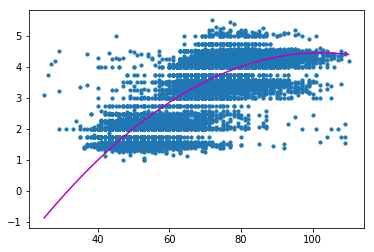

In [27]:
plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.show()

### Polynomial Fit Degree = 3

In [32]:
# shape data
X = data["waiting_min"].values.reshape(-1, 1)
y = data["dur"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (18593, 1) (18593, 1)


In [33]:
polynomial_features= PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(X)

In [34]:
model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

In [35]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

0.5812281503009634
0.7119157302675452


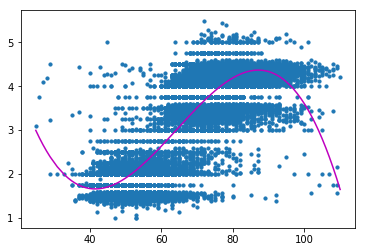

In [36]:
plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.show()